<a href="https://colab.research.google.com/github/TeamHub2/Deep-Learning/blob/main/Poteto_disease_detection_using_Resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras import Model, layers
from keras.models import load_model, model_from_json

In [ ]:

CHANNELS=3
EPOCHS=4
train_datagen = ImageDataGenerator(
    shear_range=10,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Deep learning/poteto pic/Train 70%',
    batch_size=32,
    class_mode='categorical',
    target_size=(224,224))

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

validation_generator = validation_datagen.flow_from_directory(
   '/content/drive/MyDrive/Deep learning/poteto pic/Validation 15%',
    shuffle=False,
    class_mode='categorical',
    target_size=(224,224))
test_generator = validation_datagen.flow_from_directory(
   '/content/drive/MyDrive/Deep learning/poteto pic/Test15%',
    shuffle=False,
    class_mode='categorical',
    target_size=(224,224))

Found 1506 images belonging to 3 classes.
Found 324 images belonging to 3 classes.
Found 322 images belonging to 3 classes.


In [ ]:
x,y=test_generator.next()
x.shape

(32, 224, 224, 3)

In [ ]:
conv_base = ResNet50(
    include_top=False,
    weights='imagenet')

for layer in conv_base.layers:
    layer.trainable = False

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 
predictions = layers.Dense(3, activation='softmax')(x)
model = Model(conv_base.input, predictions)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
history = model.fit(
    train_generator,
    batch_size=32,
    validation_data=validation_generator,
    verbose=1,
    epochs=4
)

Epoch 1/4
48/48 [==============================] - 956s 20s/step - loss: 0.1986 - accuracy: 0.9336 - val_loss: 0.0322 - val_accuracy: 0.9846
Epoch 2/4
48/48 [==============================] - 28s 575ms/step - loss: 0.0734 - accuracy: 0.9734 - val_loss: 0.1171 - val_accuracy: 0.9537
Epoch 3/4
48/48 [==============================] - 28s 575ms/step - loss: 0.0359 - accuracy: 0.9847 - val_loss: 0.0823 - val_accuracy: 0.9599
Epoch 4/4
48/48 [==============================] - 28s 575ms/step - loss: 0.0415 - accuracy: 0.9861 - val_loss: 0.0134 - val_accuracy: 1.0000


In [ ]:
loss, accuracy = model.evaluate(test_generator )

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

11/11 [==============================] - 150s 15s/step - loss: 0.0441 - accuracy: 0.9783
Accuracy: 0.97826087474823
Loss: 0.04411536455154419


In [ ]:
import numpy as np
from sklearn import metrics

predictions = model.predict_generator(test_generator)
predicted_classes = np.argmax(predictions, axis = 1)
true_classes = test_generator.classes
class_labels = ['Potato___Early_blight','Potato___Late_blight','Potato___healthy']
report = metrics.classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


                       precision    recall  f1-score   support

Potato___Early_blight       0.99      1.00      0.99       150
 Potato___Late_blight       0.99      0.97      0.98       150
     Potato___healthy       0.87      0.91      0.89        22

             accuracy                           0.98       322
            macro avg       0.95      0.96      0.95       322
         weighted avg       0.98      0.98      0.98       322



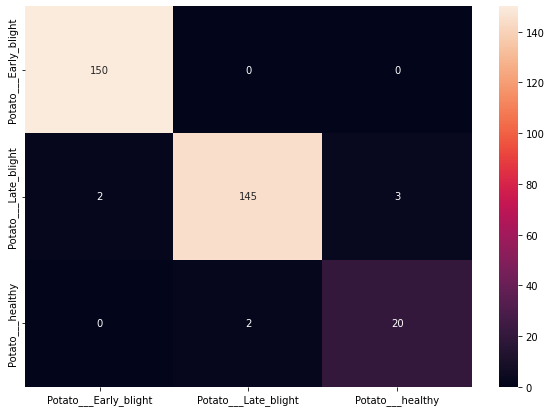

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(true_classes, predicted_classes)
df_cm = pd.DataFrame(cm, index = [i for i in ['Potato___Early_blight','Potato___Late_blight','Potato___healthy']],
                  columns = [i for i in ['Potato___Early_blight','Potato___Late_blight','Potato___healthy']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='d')

In [ ]:
history
history.params

{'epochs': 4, 'steps': 48, 'verbose': 1}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:


len(history.history['loss'])

4

In [ ]:
history.history['loss'][:5]

[0.19861763715744019,
 0.07335755974054337,
 0.03587982803583145,
 0.041546158492565155]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

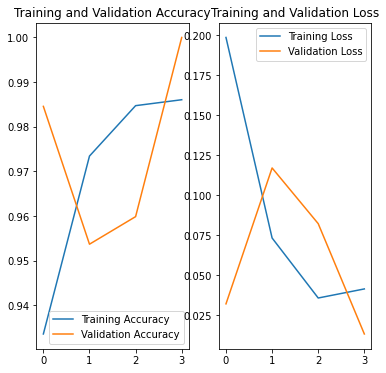

In [ ]:
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<Figure size 432x288 with 0 Axes>

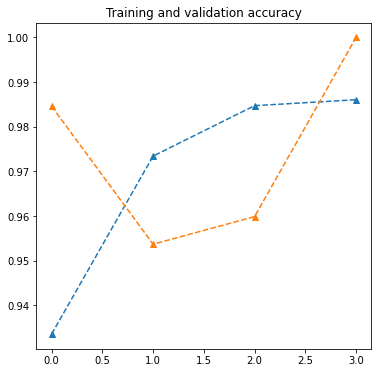

<Figure size 432x288 with 0 Axes>

In [ ]:
# Graph between Training Accuracy and Validation Accuracy
plt.figure(figsize=(6, 6))
plt.plot(history.epoch, acc,"^--", label='Training accuracy')
plt.plot(history.epoch, val_acc,"^--", label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.figure()




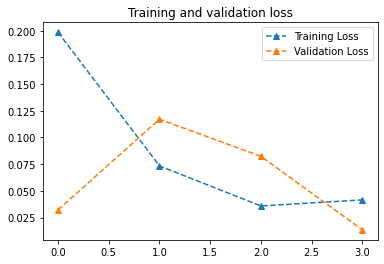

In [ ]:
# Graph between Training Loss and Validation Loss
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(history.epoch, loss,"^--", label='Training Loss')
plt.plot(history.epoch, val_loss,"^--", label='Validation Loss')
plt.title('Training and validation loss')
plt.grid(False)
plt.legend()
plt.show()


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

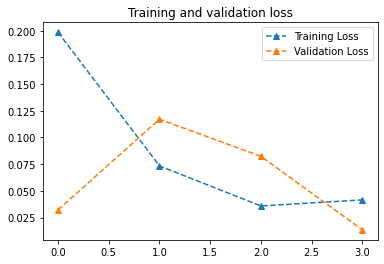

<Figure size 432x288 with 0 Axes>

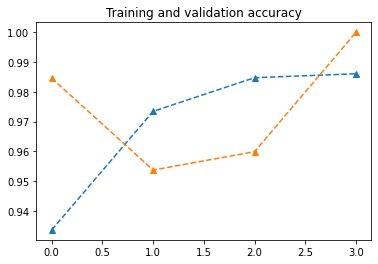

<Figure size 432x288 with 0 Axes>

In [ ]:
# Graph between Training Loss and Validation Loss
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(history.epoch, loss,"^--", label='Training Loss')
plt.plot(history.epoch, val_loss,"^--", label='Validation Loss')
plt.title('Training and validation loss')
plt.grid(False)
plt.legend()
plt.show()
# Graph between Training Accuracy and Validation Accuracy


plt.plot(history.epoch, acc,"^--", label='Training accuracy')
plt.plot(history.epoch, val_acc,"^--", label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.grid(False)
plt.figure()